# DICOM header and EDA for Thyroid Sono

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom

%matplotlib inline

## Load data

In [3]:
cancer_df = pd.read_csv('/media/share/data/thyroid/subinfo/throidc2.csv')
healthy_df = pd.read_csv('/media/share/data/thyroid/subinfo/throidh2.csv')

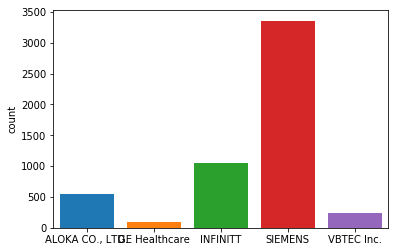

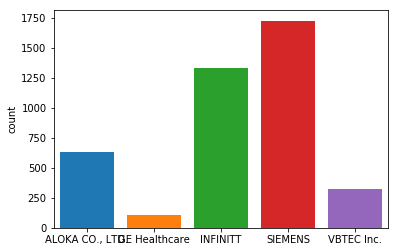

In [9]:
import seaborn as sns

plt.figure()
sns.countplot(sorted(cancer_df['Manufacturer']), saturation=2)

plt.figure()
sns.countplot(sorted(healthy_df['Manufacturer']), saturation=2)

## Dicom Header Preprocess  
    In above figures we found there are five types of sono equipments, we will then go further to find out if there is any issue needed to be solved before model training. 

### DICOM Header  
    Dicom header contains all the information we need when processing dicom image. In the sono dataset we have, one dicom file may contain more than one sono images. 
<span style="color:red;"> INFINITT & VBTEC Inc. </span> do not provide too much information in its dicom header, for deep learning porpose those files were excluded from the training data. Here are some information is critical for the image segmentation:  
> __SequenceOfUltrasoundRegions__: how many images in the dicom image  
> __RequestAttributesSequence__: same with above  
> __RegionSpatialFormat__: 0 is colorbar, so we need **> 0** in here  
> __RegionDataType__: color coding, 1 is binary, 2 is RGB  

In [27]:
excl_manuf = ['INFINITT', 'VBTEC Inc.']

# cancer
clean_can01 = cancer_df[~cancer_df['Manufacturer'].isin(excl_manuf)]
print("cancer cases: ", clean_can01['pid'].nunique())

# healthy
clean_hly01 = healthy_df[~healthy_df['Manufacturer'].isin(excl_manuf)]
print("healthy cases: ", clean_hly01['pid'].nunique())

cancer cases:  233
healthy cases:  255


In [ ]:
for x in dcm.RequestAttributesSequence:
    if np.logical_and(x.RegionSpatialFormat > 0, x.RegionDataType == 1):
    plt.figure(figsize=(10,10))
    img = dcm.pixel_array
    plt.imshow(img)
    plt.imsave(img, '/media/share/data/thyroid/test.png')